In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mglearn
# pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)
plt.rcParams['font.sans-serif']=['Times New Roman']
plt.rc('axes', unicode_minus=False)
#建立Features
datasets=pd.read_table("PEER_Dataset.txt",sep='\s+')
datasets=pd.DataFrame(datasets)
feature=datasets.iloc[:,0:13]
#特征归一化
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

# scaler=MinMaxScaler(feature_range=(0,1))
# feature=scaler.fit_transform(feature)

# scaler = StandardScaler()
# feature=scaler.fit_transform(feature)

feature=pd.DataFrame(feature)

#建立Targets
target=[]
labels=["Flexure","Flexure-Shear","Shear"]
for i in datasets.iloc[:,13]:
    if i=="Flexure":
        target.append(0)
    if i == "Flexure-Shear":
        target.append(1)
    if i=="Shear":
        target.append(2)

#样本划分
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(feature,target,random_state=666,test_size=0.3)

draw_color=np.array([])
for i in target:
    if i==0:
        draw_color=np.append(draw_color,'#283c63')
    if i==1:
        draw_color=np.append(draw_color,'#07689f')
    if i==2:
        draw_color=np.append(draw_color,'#f85f73')

Text(0, 0.5, 'Practical results')

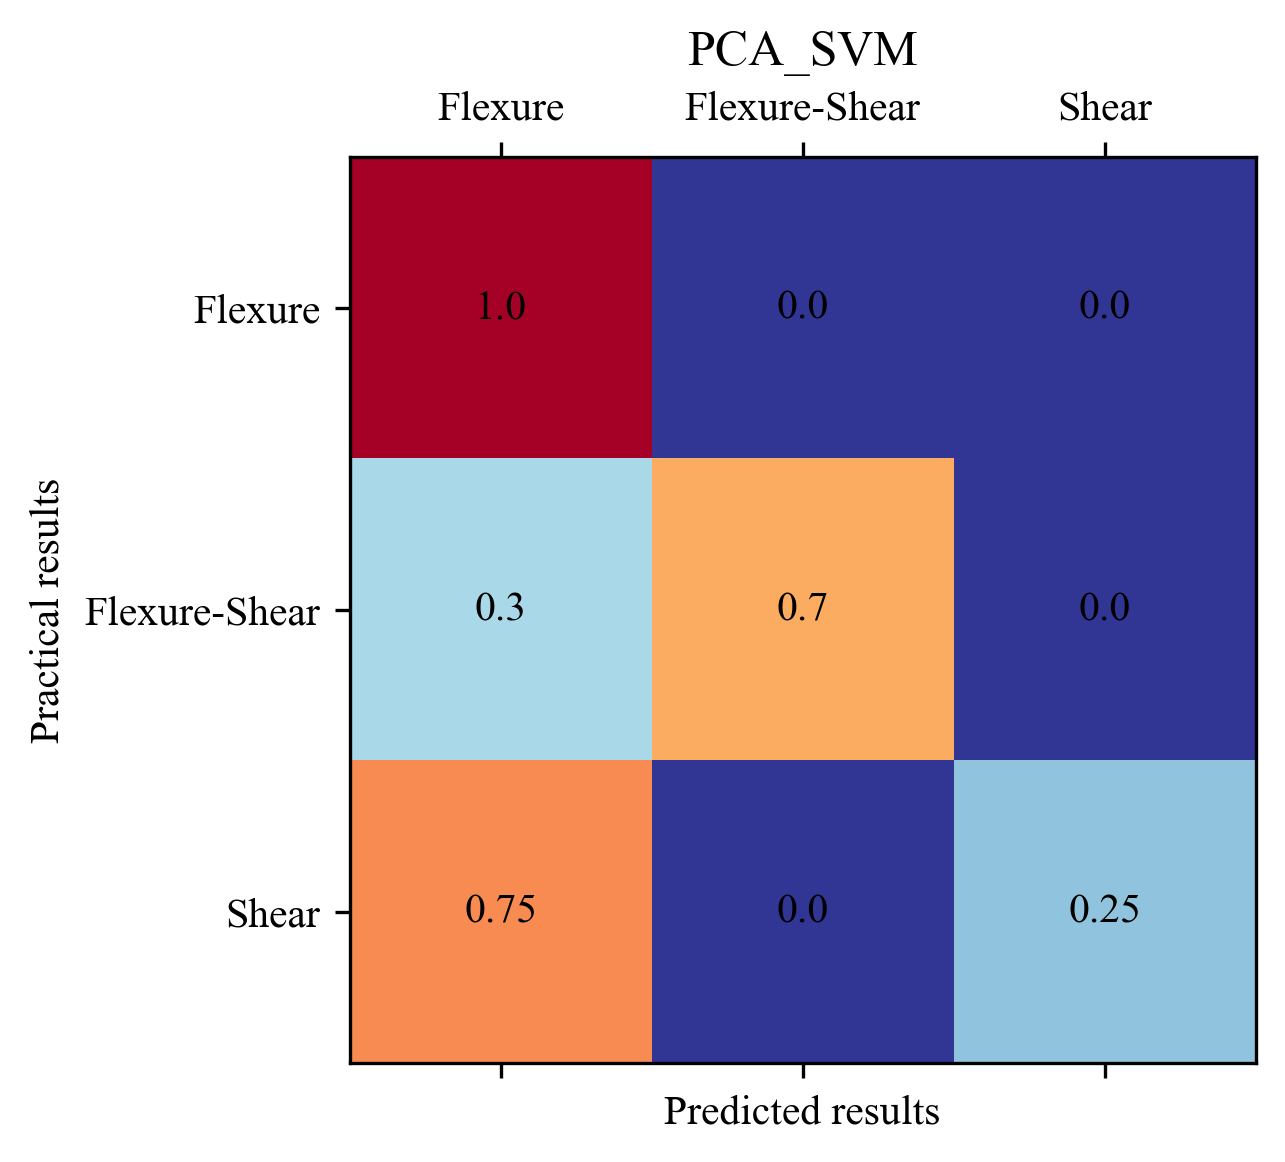

In [42]:
from sklearn.svm import SVC
svm=SVC(kernel='rbf',C=100,gamma=0.01)
svm.fit(X_train,y_train)
y_pred=svm.predict(X_test)

from sklearn.metrics import confusion_matrix
conf_mx=confusion_matrix(y_test, y_pred,labels=[0,1,2])
row_sums=conf_mx.sum(axis=1,keepdims=True)
norm_conf_mx=conf_mx/row_sums

fig,ax = plt.subplots(dpi=300)
ax.matshow(norm_conf_mx,cmap="RdYlBu_r")

for i in range(3):
    for j in range(3):
        text = ax.text(j, i, round(norm_conf_mx[i, j],2),ha="center", va="center", color="k")

ax.set_title("PCA_SVM")
ax.set_xticks(np.arange(len(labels)))
ax.set_yticks(np.arange(len(labels)))
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)
ax.set_xlabel("Predicted results")
ax.set_ylabel("Practical results")

# PCA

In [43]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
pca.fit(feature)
X_pca=pca.transform(feature)
X_pca=pd.DataFrame(X_pca)
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_pca,target,random_state=666,test_size=0.3)

Text(0, 0.5, 'Practical results')

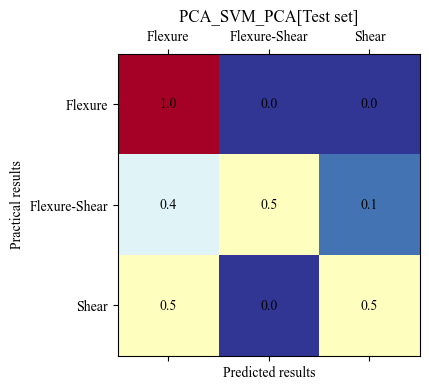

In [44]:
from sklearn.svm import SVC
svm=SVC(kernel='rbf',C=100,gamma=0.01)
svm.fit(X_train,y_train)
y_pred=svm.predict(X_test)

from sklearn.metrics import confusion_matrix
conf_mx=confusion_matrix(y_test, y_pred,labels=[0,1,2])
row_sums=conf_mx.sum(axis=1,keepdims=True)
norm_conf_mx=conf_mx/row_sums

fig,ax = plt.subplots(dpi=100)
ax.matshow(norm_conf_mx,cmap="RdYlBu_r")

for i in range(3):
    for j in range(3):
        text = ax.text(j, i, round(norm_conf_mx[i, j],2),ha="center", va="center", color="k")

ax.set_title("PCA_SVM_PCA[Test set]")
ax.set_xticks(np.arange(len(labels)))
ax.set_yticks(np.arange(len(labels)))
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)
ax.set_xlabel("Predicted results")
ax.set_ylabel("Practical results")

Text(0, 0.5, 'Practical results')

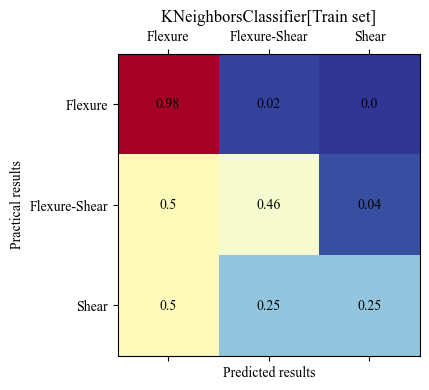

In [45]:
from sklearn.neighbors import KNeighborsClassifier
kn=KNeighborsClassifier(n_neighbors=5)
kn.fit(X_train,y_train)
y_pred=kn.predict(X_train)

from sklearn.metrics import confusion_matrix
conf_mx=confusion_matrix(y_train, y_pred,labels=[0,1,2])
row_sums=conf_mx.sum(axis=1,keepdims=True)
norm_conf_mx=conf_mx/row_sums

fig,ax = plt.subplots(dpi=100)
ax.matshow(norm_conf_mx,cmap="RdYlBu_r")

for i in range(3):
    for j in range(3):
        text = ax.text(j, i, round(norm_conf_mx[i, j],2),ha="center", va="center", color="k")

ax.set_title("KNeighborsClassifier[Train set]")
ax.set_xticks(np.arange(len(labels)))
ax.set_yticks(np.arange(len(labels)))
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)
ax.set_xlabel("Predicted results")
ax.set_ylabel("Practical results")

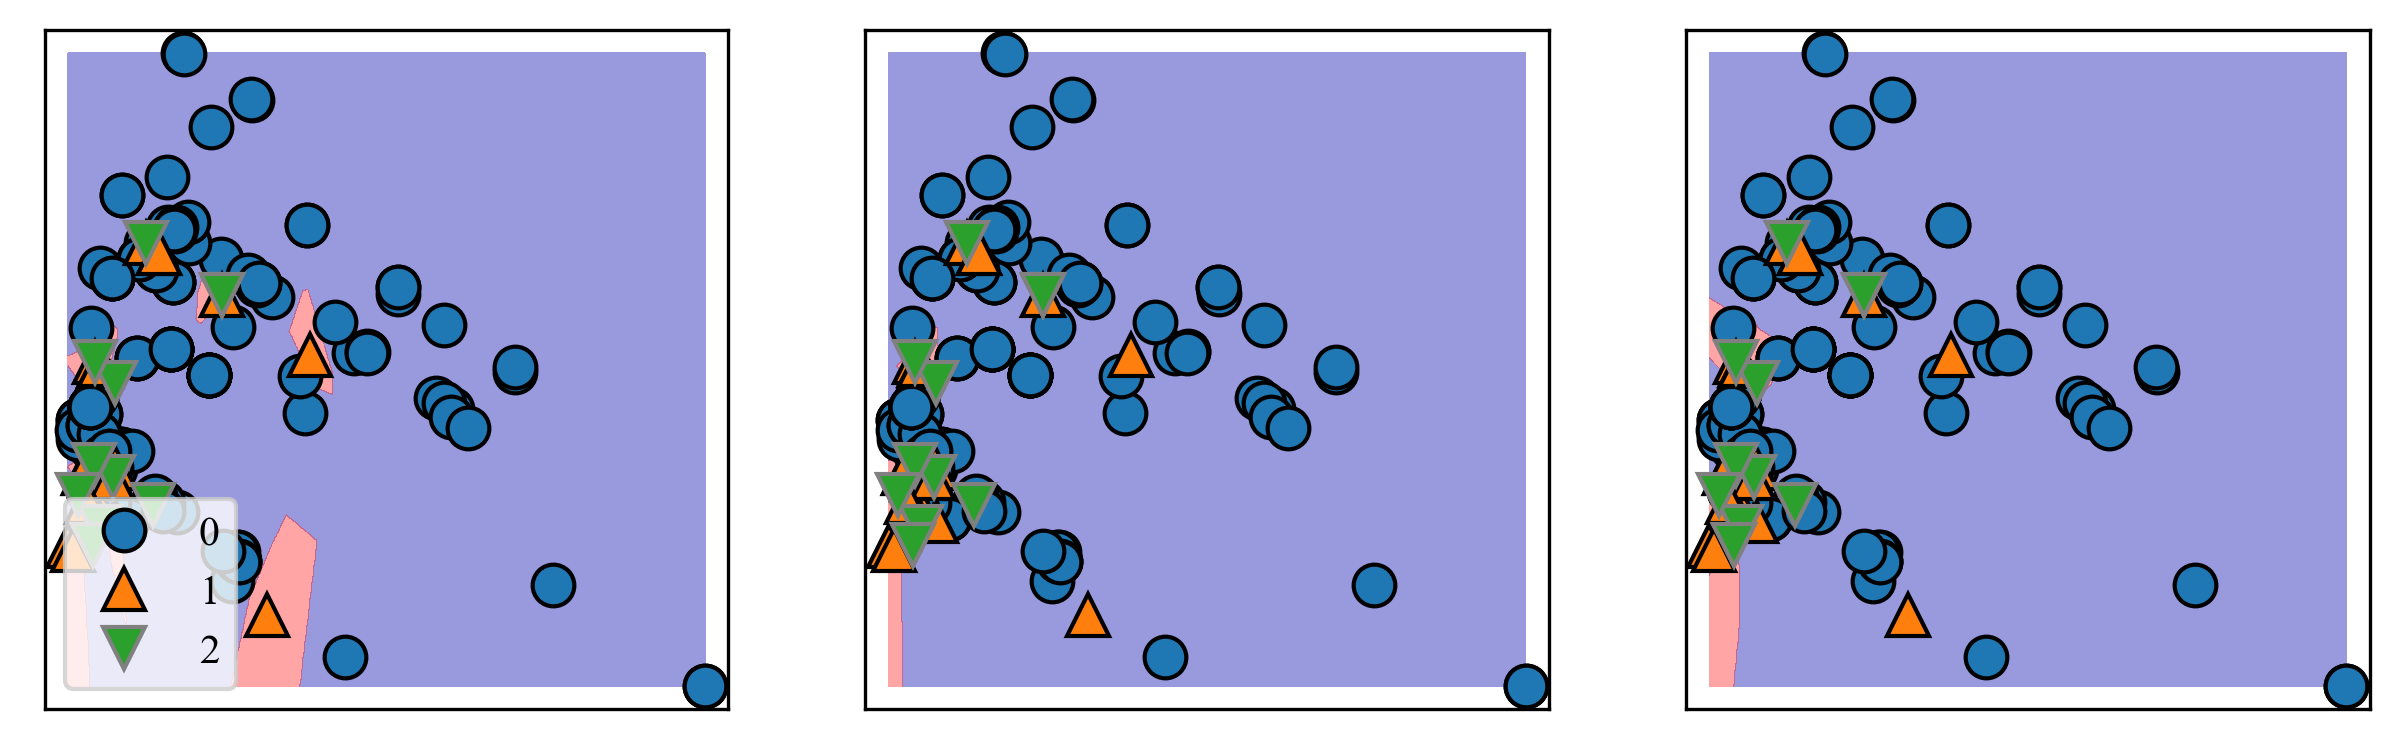

In [48]:
# X_train=X_train.to_numpy()
# y_train=y_train.to_numpy()
from sklearn.neighbors import KNeighborsClassifier
fig,axes=plt.subplots(1,3,figsize=(10,3),dpi=300)
for n_neighbor,ax in zip([1,3,9],axes):
    clf=KNeighborsClassifier(n_neighbors=n_neighbor).fit(X_train,y_train)
    mglearn.plots.plot_2d_separator(clf,X_train,fill=True,eps=0.5,ax=ax,alpha=0.4)
    mglearn.discrete_scatter(X_train[:,0],X_train[:,1],y_train,ax=ax)
axes[0].legend(loc=3)
